In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

In [96]:
# Загрузка данных
file_path = 'magn_17_05_25_cleaned.csv'  # Убедитесь, что файл находится в той же директории
try:
    df = pd.read_csv(file_path, delimiter=';', decimal=',')
    print("Данные успешно загружены.")
except Exception as e:
    print(f"Ошибка при загрузке файла: {e}")

Данные успешно загружены.


In [83]:
print("\nИнформация о датасете:")
print(df.info())


Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575 entries, 0 to 574
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       575 non-null    int64  
 1   Nmagn   571 non-null    float64
 2   Bn      571 non-null    float64
 3   Bs      571 non-null    float64
 4   Bav     571 non-null    float64
 5   Fb      556 non-null    float64
 6   Fb_pm   409 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 31.6 KB
None


In [97]:
print("\nОписательная статистика:")
print(df.describe())


Описательная статистика:
               Nm        Nm_pm          Bn          Bs         Bav  \
count  571.000000   571.000000  571.000000  571.000000  571.000000   
mean   288.112084   565.040280  230.049037  231.010508  230.143345   
std    167.010625   558.878388    9.208370   10.081765    9.902108   
min      1.000000     1.000000  210.000000  209.000000    5.850000   
25%    143.500000   200.000000  222.000000  224.000000  229.000000   
50%    288.000000   451.000000  231.000000  232.000000  230.500000   
75%    433.500000   655.500000  237.000000  238.000000  232.000000   
max    576.000000  2910.000000  251.000000  336.000000  279.500000   

               Fb       Fb_pm  
count  556.000000  409.000000  
mean     5.889388    7.486015  
std      0.051566    0.067009  
min      5.730000    7.280000  
25%      5.860000    7.440000  
50%      5.890000    7.490000  
75%      5.930000    7.530000  
max      6.070000    7.710000  


In [85]:
# Проверка на дубликаты
print("\nКоличество дубликатов в данных:", df.duplicated().sum())


Количество дубликатов в данных: 0


In [86]:
# Проверка пропущенных значений
print("\nКоличество пропущенных значений по столбцам:")
print(df.isnull().sum())


Количество пропущенных значений по столбцам:
N          0
Nmagn      4
Bn         4
Bs         4
Bav        4
Fb        19
Fb_pm    166
dtype: int64


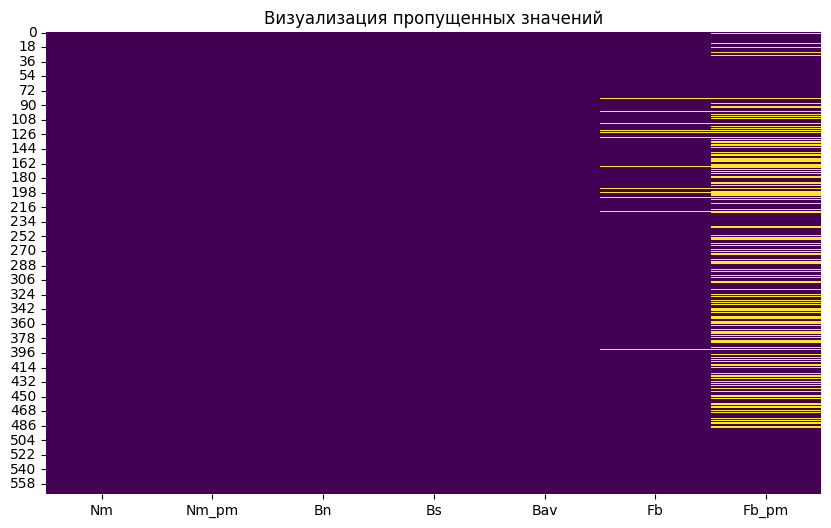

In [101]:
# Визуализация пропущенных значений
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Визуализация пропущенных значений')
plt.show()

In [ ]:
# 2. Преобразование числовых столбцов
# Заметим, что в данных используются запятые как десятичные разделители
n = 0
numeric_cols = ['Bn', 'Bs', 'Fb']
for col in numeric_cols:
    if col in df.columns:
        # Заменяем запятые на точки и преобразуем в float
        # df[col] = df[col].astype(str).str.replace(',', '.').astype(float)
        n += 1
    else:
        print(f"Столбец {col} отсутствует в данных")
n

3

In [88]:
# Проверка преобразования
print("\nТипы данных после преобразования:")
print(df.dtypes)


Типы данных после преобразования:
N          int64
Nmagn    float64
Bn       float64
Bs       float64
Bav      float64
Fb       float64
Fb_pm    float64
dtype: object


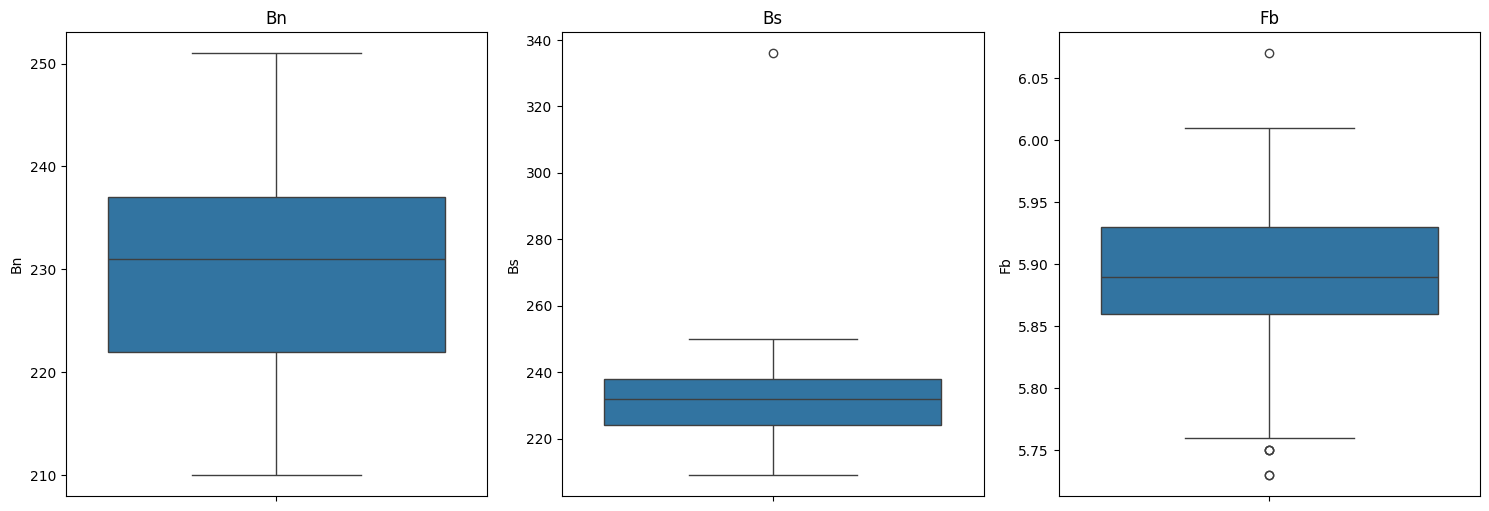

In [89]:
# Анализ выбросов
numeric_cols = ['Bn', 'Bs', 'Fb']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
# Заполнение пропущенных значений
# Стратегия заполнения зависит от столбца
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if col in ['Fb', 'Fb_pm']:
            # Для этих столбцов заполним медианными значениями
            median_val = df[col].median()
            df[col] = df[col].fillna(median_val)
            print(f"Заполнено {df[col].isnull().sum()} пропусков в {col} медианным значением {median_val}")
        elif col in ['Bn', 'Bs', 'Bav']:
            # Для этих столбцов можно попробовать вычислить отсутствующие значения
            if col == 'Bav':
                # Вычислим среднее, если отсутствует
                mask = df['Bav'].isnull()
                df.loc[mask, 'Bav'] = (df.loc[mask, 'Bn'] + df.loc[mask, 'Bs']) / 2
                print(f"Вычислены отсутствующие значения в {col} как среднее Bn и Bs")
            elif col in ['Bn', 'Bs']:
                # Если отсутствует Bn или Bs, попробуем вычислить из Bav
                if 'Bav' in df.columns:
                    if col == 'Bn':
                        mask = df['Bn'].isnull()
                        df.loc[mask, 'Bn'] = 2 * df.loc[mask, 'Bav'] - df.loc[mask, 'Bs']
                    elif col == 'Bs':
                        mask = df['Bs'].isnull()
                        df.loc[mask, 'Bs'] = 2 * df.loc[mask, 'Bav'] - df.loc[mask, 'Bn']
                    print(f"Вычислены отсутствующие значения в {col} на основе Bav")

Вычислены отсутствующие значения в Bn на основе Bav
Вычислены отсутствующие значения в Bs на основе Bav
Вычислены отсутствующие значения в Bav как среднее Bn и Bs
Заполнено 0 пропусков в Fb медианным значением 5.89
Заполнено 0 пропусков в Fb_pm медианным значением 7.49


In [91]:
# Проверка оставшихся пропусков
print("\nОставшиеся пропуски после обработки:")
print(df.isnull().sum())


Оставшиеся пропуски после обработки:
N          0
Nmagn      0
Bn         0
Bs         0
Bav        0
Fb        15
Fb_pm    162
dtype: int64


In [90]:
# Удаление строк, где все ключевые значения отсутствуют
# Определим ключевые столбцы
key_cols = ['Nmagn']
df_cleaned = df.dropna(subset=key_cols, how='all')
print(f"\nУдалено {len(df) - len(df_cleaned)} строк, где все ключевые значения отсутствовали")
df = df_cleaned.copy()


Удалено 4 строк, где все ключевые значения отсутствовали


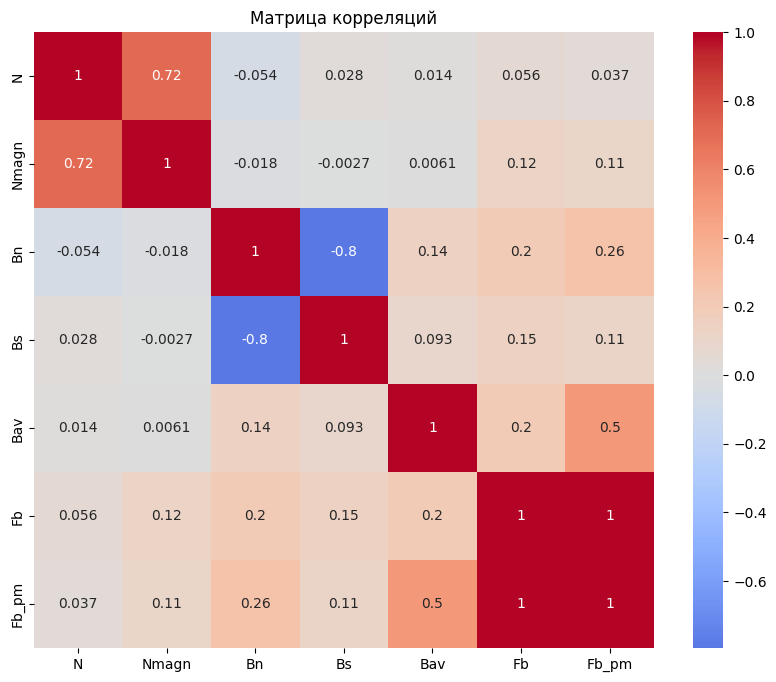

In [92]:
# Анализ корреляции
plt.figure(figsize=(10, 8))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляций')
plt.show()

In [98]:
# Сохранение очищенных данных
output_file = 'magn_17_05_25_cleaned.csv'
df.to_csv(output_file, index=False, sep=',', decimal='.')
print(f"\nОчищенные данные сохранены в файл {output_file}")


Очищенные данные сохранены в файл magn_17_05_25_cleaned.csv


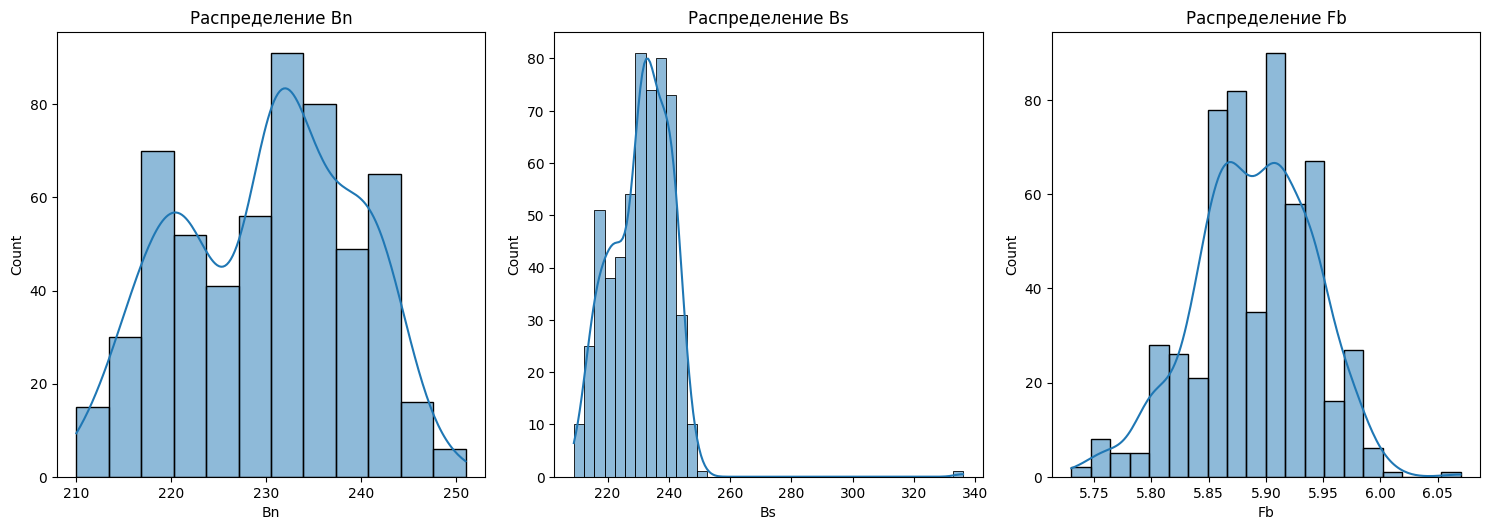

In [99]:
# Дополнительный анализ - гистограммы распределений
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Распределение {col}')
plt.tight_layout()
plt.show()

In [100]:
# Вывод итоговой информации
print("\nИтоговая информация о датасете:")
print(f"Количество строк: {len(df)}")
print(f"Количество столбцов: {len(df.columns)}")
print("\nПервые 5 строк очищенного датасета:")
print(df.head())


Итоговая информация о датасете:
Количество строк: 571
Количество столбцов: 7

Первые 5 строк очищенного датасета:
   Nm  Nm_pm   Bn   Bs    Bav    Fb  Fb_pm
0   1      1  227  230  228.5  5.81   7.38
1   2      3  243  222  232.5  5.93    NaN
2   3      4  219  246  232.5  5.87   7.46
3   4      5  239  219  229.0   NaN    NaN
4   5      6  244  219  231.5  5.88   7.47
